<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_water_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O)**

In [ ]:
!pip install pyscf matplotlib geometric openfermion openfermionpyscf pennylane cirq openfermioncirq -q

In [ ]:
# Define molecule
from pyscf import gto
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

In [ ]:
# Define the molecule
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''

# Name
molecule = 'Water (H₂O)'

# Set basis set (use a common basis set, good balance between accuracy and computational cost)
mol.basis = 'cc-pvdz' # Alternatively: sto-3g, cc-pvdz,6-31G

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

### **Methods**

**Approaches to Calculate Ground State Energies of Atoms and Molecules**  

<font color="blue">**First Quantization**</font><br>
Focuses on explicitly solving the Schrödinger equation for electrons and nuclei.  
1. **Single-Point Calculations**: Calculates the energy and other properties for a fixed geometry without moving the atoms (one step).
   - **Hartree-Fock**-SCF  
   - **DFT-SCF**
   * **Semi-Empirical Methods** Simplified approximations of ab initio methods like Hartree-Fock. They rely on parameterized experimental data and are computationally efficient, often used for large systems.
    * AM1 - Austin Model 1
    * PM3
    * MNDO
   * **Density Functional Tight Binding** (DFTB): Simplified DFT; retains quantum mechanical principles. Often used for larger systems where DFT is too expensive but you still want to retain some quantum mechanical accuracy.
   * **Hartree-Fock Exchange-Only** Simplification where only the exchange interaction is included without electron correlation (similar to HF), but done through approximations that allow for faster calculations. It is rarely used in modern calculations but can sometimes be useful in specific contexts.
    * Xα
    * X-Only
2. **Full Geometry Optimization**: Finds the equilibrium structure by minimizing energy. Iteratively adjusts the positions of atoms to find the lowest energy configuration (many steps).
3. **Molecular Dynamics**: Simulates time evolution based on forces from quantum or classical mechanics. Tracks the motion of atoms over time by updating positions and velocities at each time step (many steps). - Use LAMMPS, GROMACS, or CP2K. Combine with packages like ASE (Atomic Simulation Environment) for quantum molecular dynamics.
  * **Ab Initio Molecular Dynamics** (AIMD) (e.g., Car-Parrinello MD, Born-Oppenheimer MD): Directly calculates forces using quantum mechanical methods like DFT.
  * **Semi-Empirical MD** (e.g., DFTB): Faster approximations of AIMD.
  * **Quantum Mechanics/Molecular Mechanics** (QM/MM) MD: Combines QM and MM regions for large systems.
  * **Tight Binding MD**: Semi-empirical like DFTB.
  * **Classical Force Fields**: Uses parameterized equations, strictly classical and not quantum.
  * **Coarse-Grained MD**: Simplifies atomic interactions into larger groupings for efficiency.
4. **Excited State Calculations**:  
   - Time-Dependent Density Functional Theory (TD-DFT)  
   - Direct diagonalization of the Hamiltonian  
5. **Spectroscopy Simulations**: using first-principles vibrational/electronic transitions. Computation of properties that correspond to experimental spectroscopic measurements like:
  * Infrared (IR) Spectroscopy: Models the vibrational transitions of a molecule, providing insight into bond strengths and functional groups.
  * Raman Spectroscopy: Focuses on inelastic scattering of light, revealing information about molecular vibrations, rotational transitions, and electronic states.
  * UV-Vis Spectroscopy: Models electronic transitions to understand energy levels and bonding.

<font color="blue">**Second Quantization**</font><br>
Uses creation and annihilation operators to efficiently handle electron correlation and many-body effects.  
1. **Single-Point Calculations**:  
   - **Post-Hartree-Fock**: Coupled Cluster, Møller-Plesset Perturbation, Configuration Interaction  
   - **Other Advanced Methods**: Quantum Monte Carlo, Density Matrix Renormalization Group, Green’s Function Methods  
   - **Quantum Algorithms**: Variational Quantum Eigensolver (VQE), Quantum Phase Estimation (QPE)  
2. **Full Geometry Optimization**: Extends single-point calculations by optimizing nuclear positions.  
3. **Molecular Dynamics**: Simulates time evolution of nuclei with quantum-derived force fields. Less common for direct MD simulations due to its operator-based formalism. It might indirectly contribute to MD simulations through force-field generation or reaction dynamics when electronic structure changes are needed.
4. **Excited State Calculations**: Includes Configuration Interaction Singles (CIS) and Green's functions for electronic excitations.  
5. **Spectroscopy Simulations**: Models IR, Raman, UV-Vis spectra using many-body formalisms (e.g., Bethe-Salpeter equation).

### **Emission and Absorption Spectra**

converged SCF energy = -74.9629466565387


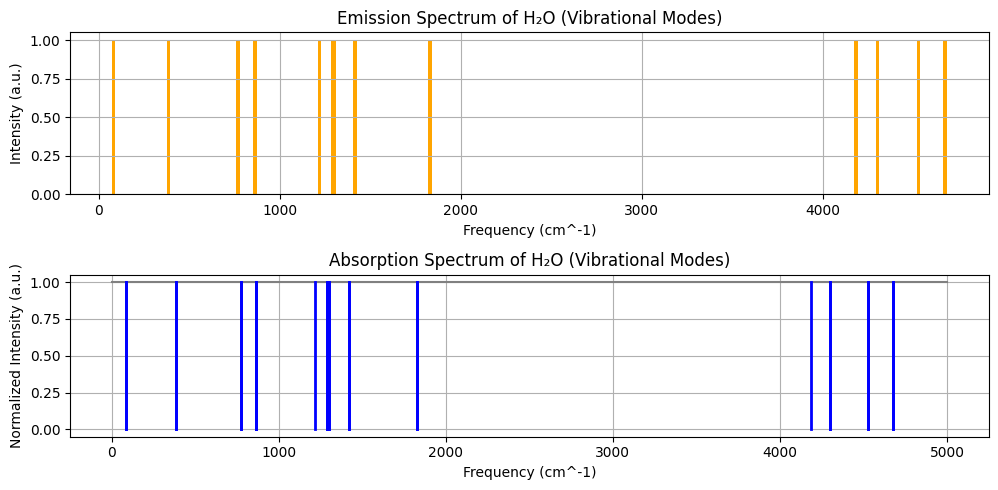

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation for molecular vibrational frequencies
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Simulate and plot both emission and absorption spectra
# Emission Spectrum (peaks at specific frequencies)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # First plot: Emission Spectrum
plt.bar(frequencies, height=1.0, width=20.0, color='orange')
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Emission Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

# Absorption Spectrum (dips at specific frequencies)
plt.subplot(2, 1, 2)  # Second plot: Absorption Spectrum
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000), color='gray')  # Baseline at 1.0 intensity
for freq in frequencies:
    plt.plot([freq, freq], [1.0, 0.0], color='blue', lw=2)  # Draw vertical absorption dips
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Normalized Intensity (a.u.)')
plt.title('Absorption Spectrum of H₂O (Vibrational Modes)')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Vibrational Frequencies**

converged SCF energy = -74.9629466565387


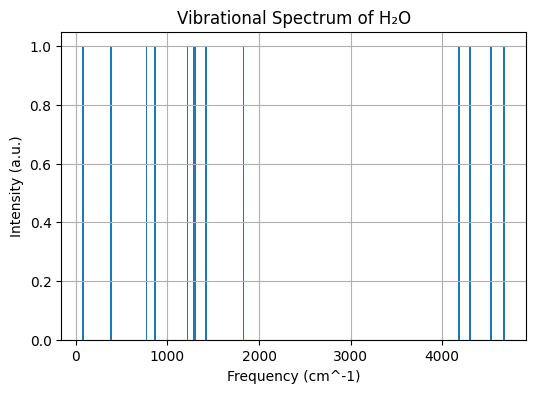

Vibrational frequencies (in cm^-1):
1218.90 cm^-1
4184.92 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4302.54 cm^-1
1830.05 cm^-1
861.89 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
4676.28 cm^-1
82.16 cm^-1
861.89 cm^-1
1417.23 cm^-1
385.67 cm^-1
1290.59 cm^-1
770.78 cm^-1
1298.36 cm^-1
4529.69 cm^-1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian

# Step 1: Define the molecule (H2O in this case)
mol.atom = mol.atom
mol.basis = 'sto-3g'
mol.symmetry = True
mol.build()

# Step 2: Perform Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Step 3: Calculate the Hessian matrix (force constants)
# Hessian matrix of second derivatives of energy with respect to nuclear displacements is computed
hess = hessian.RHF(mf).kernel()

# Step 4: Diagonalize the Hessian to get vibrational frequencies
# Vvibrational frequencies are obtained by diagonalizing Hessian matrix and converting results from atomic units to cm⁻¹
frequencies = np.linalg.eigvalsh(hess)
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)

# Step 5: Filter out non-physical (imaginary) frequencies and limit to realistic range
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Typical range for molecular vibrations

# Step 6: Plot the vibrational spectrum
plt.figure(figsize=(6, 4))
plt.bar(frequencies, height=1.0, width=20.0)
plt.xlabel('Frequency (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Vibrational Spectrum of H₂O')
plt.grid(True)
plt.show()

# Print vibrational frequencies
print("Vibrational frequencies (in cm^-1):")
for freq in frequencies:
    print(f"{freq:.2f} cm^-1")

### **Ground State with HF-SCF**

converged SCF energy = -76.0267936449739


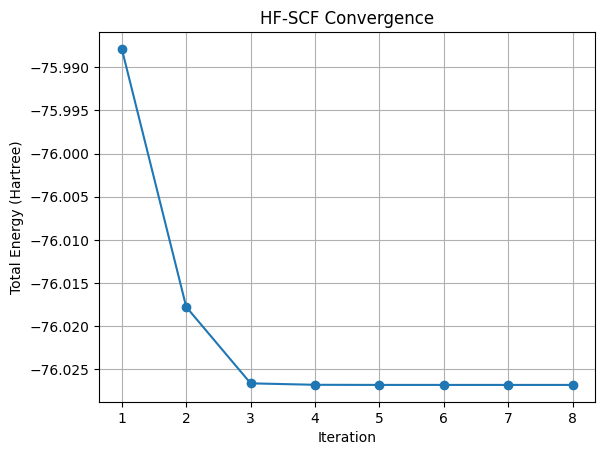

HF-SCF energy for H2O: -76.02679364497389 Hartree


In [ ]:
# Hartree-Fock SCF (Slater Determinant)
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")

In [ ]:
# Hartree-Fock Hamiltonian includes electron-electron interaction in form of exchange integrals.
# In Hartree-Fock theory, electrons are described using a Slater determinant of single-particle orbitals,
# and Hamiltonian includes terms for the kinetic energy, electron-nuclear attraction, and electron-electron repulsion

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -76.0267936449739


-76.02679364497392

### **HF-SCF Core Hamiltonian matrix**

In [ ]:
# Core Hamiltonian matrix represents one-electron part of molecular Hamiltonian
# = kinetic energy operator of electrons and electrostatic attraction operator between electrons and nuclei
# Core Hamiltonian does not include electron-electron interactions

# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-3.30266742e+01  7.86885373e+00 -5.92940699e+00  0.00000000e+00
   0.00000000e+00 -3.06478075e-02  0.00000000e+00  0.00000000e+00
  -5.73180346e-03  0.00000000e+00  0.00000000e+00 -3.84923952e-04
   0.00000000e+00  3.35894308e-03 -1.62279641e+00 -2.10585214e+00
   0.00000000e+00  2.68023438e+00  2.07311975e+00 -1.62279641e+00
  -2.10585214e+00  0.00000000e+00 -2.68023438e+00  2.07311975e+00]
 [ 7.86885373e+00 -1.02785814e+01 -5.04442940e+00  0.00000000e+00
   0.00000000e+00 -1.70475422e-01  0.00000000e+00  0.00000000e+00
  -1.15911214e-01  0.00000000e+00  0.00000000e+00 -9.37449906e-03
   0.00000000e+00  8.18042331e-02 -2.14274568e+00 -2.44231854e+00
   0.00000000e+00  2.30454912e+00  1.75477703e+00 -2.14274568e+00
  -2.44231854e+00  0.00000000e+00 -2.30454912e+00  1.75477703e+00]
 [-5.92940699e+00 -5.04442940e+00 -7.61956807e+00  0.00000000e+00
   0.00000000e+00 -1.77925761e-01  0.00000000e+00  0.00000000e+00
  -2.42181267e-01  0.00000000e+00  0.000

### **HF-SCF Fock Matrix**

In [ ]:
# Fock matrix approximates many-electron wavefunction of system (H₂O),
# i.e. approximates interactions between electrons in a system to find an optimal set of orbitals.
# It gives snapshot of molecule electronic structure, incl. energies of molecular orbitals and how they interact or mix

# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-2.05503070e+01  4.42448190e+00 -3.95660733e+00 -1.66323423e-17
   8.32667268e-17 -2.41662208e-02 -1.74924092e-18 -3.46944695e-18
  -6.01764295e-03 -1.88332446e-18  3.85975973e-17 -5.01310614e-05
  -6.80653346e-18 -1.20872661e-03 -1.09323297e+00 -1.41449454e+00
  -1.36642031e-18  1.78970445e+00  1.38345313e+00 -1.09323297e+00
  -1.41449454e+00 -1.82450652e-18 -1.78970445e+00  1.38345313e+00]
 [ 4.42448190e+00 -1.77436135e+00 -3.63157077e-01 -4.82871938e-17
   1.96023753e-16 -4.06665759e-02 -1.17607816e-17  1.04083409e-16
  -6.01372077e-02 -3.91336601e-18  1.49186219e-16 -6.84863507e-03
  -3.17229360e-18  8.57775181e-02 -4.45334301e-01 -4.42871045e-01
  -3.54996147e-18  4.43589556e-02  3.68621936e-02 -4.45334301e-01
  -4.42871045e-01 -8.41346131e-18 -4.43589556e-02  3.68621936e-02]
 [-3.95660733e+00 -3.63157077e-01 -1.81678753e+00 -7.09417923e-17
   1.42247325e-16 -9.49263136e-02 -3.63196189e-17  4.92661467e-16
  -1.76260013e-01 -1.10479886e-18

In [ ]:
print("Fock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix Shape: (24, 24)
Fock Matrix Size: 576
Fock Matrix Dimension: 2
Fock Matrix Trace: -5.927529968220233
Fock Matrix Determinant: -0.3799637617375517
Fock Matrix Rank: 24


* **Shape**: corresponds to 24 basis functions (molecular orbitals) used to describe water molecule (H₂O) = 1s orbitals of the hydrogen atoms + oxygen atom's $2s, 2p_x, 2p_y$, and $2p_z$ orbitals + additional basis functions from higher-order functions like polarization or diffuse functions depending on theory or basis set (e.g., STO-3G, 6-31G, etc.)
* **Size**: 24 x 24 = 576. All interactions between 24 orbitals (both diagonal and off-diagonal). Represent pairwise interactions between orbitals as N x N matrix. Each element $F_ij$ corresponds to interaction between orbital i and orbital j.
* **Trace**: diagonal elements correspond to one-electron energies of molecular orbitals. In stable molecule like water, most electrons occupy bound molecular orbitals with negative energies (relative to free electron), hence a negative trace. Magnitude of trace depends on the specific molecular orbitals' energy levels, which are influenced by the electron-nuclear and electron-electron interactions in the Hartree-Fock approximation.
* **Rank**: = number of linearly independent rows or columns. Rank is 24 (equal to number of rows/columns) = all 24 molecular orbitals are linearly independent, none redundant - expected in Hartree-Fock calculation where each basis function represents a unique molecular orbital.
* **Determinant**: insights into matrix's invertibility and system's stability.
  * A determinant close to zero (but not exactly zero) typically suggests that the matrix is close to being singular, meaning it is almost non-invertible. This could imply that some of the molecular orbitals are nearly degenerate or that the system is on the verge of instability.
  * A negative determinant indicates a specific symmetry property or interaction of the molecular orbitals, but the exact physical meaning is more abstract in this context.
  * -0.38 suggests that there are significant interactions between orbitals, but system remains stable, as determinant is not zero.


### **HF-SCF Molecular Orbital Coefficients for All Orbitals (occupied and unoccupied)**

In [ ]:
# Retrieve Hartree-Fock orbitals (related to the Slater determinant) - occupied and unoccupied
# Occupied orbitals: contain electrons in Hartree-Fock ground state
# Virtual orbitals: unoccupied in ground state but can be important for excited state or post-Hartree-Fock methods like MP2 or CISD (electronic correlation effects)

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print("Molecular Orbital Energies:\n", mo_energy)

converged SCF energy = -76.0267936449739
Molecular Orbital Coefficients (MO coefficients):
 [[ 1.00089979e+00 -8.21604151e-03 -4.59873169e-16  2.16305736e-03
   1.77310835e-16 -5.20574216e-02 -1.79433495e-15 -6.81963867e-15
  -6.51033846e-02  3.14639080e-03 -4.70072965e-16  8.44225813e-15
   2.02016030e-01  1.76844600e-15 -7.29782654e-17 -7.24314862e-01
   1.94589399e-14 -3.81342580e-14  2.78505588e-01  5.37691872e-19
  -1.39537358e-16 -8.42916924e-02 -1.42425038e-01 -6.72944582e-15]
 [ 1.17545240e-03  4.42883335e-01  1.60868481e-16 -1.50393950e-01
   3.21845420e-16  7.26049469e-02 -1.80131319e-14 -2.40018767e-14
  -2.55809190e-01  1.14706356e-01 -7.36025172e-16  1.80108478e-14
   5.29322337e-01  4.58190437e-15 -1.77880743e-16 -1.59283979e+00
   4.26834927e-14 -9.53089205e-14  7.29453105e-01  2.63177407e-18
  -3.27841898e-16 -1.54240789e-01 -1.75143749e-01 -1.07782110e-14]
 [-2.66588259e-03  3.75739337e-01  4.56635226e-15 -3.49801235e-01
  -9.80281441e-16  1.00273972e+00 -4.20599845e-1

### **HF-SCF Molecular Orbital Coefficients for only occupied orbitals**

In [ ]:
# Extract and display the occupied molecular orbitals - used to construct Slater determinant - Only occupied orbitals

# The mo_occ variable stores the occupation numbers, which are usually 2 for occupied orbitals
# in a closed-shell Hartree-Fock calculation (since there are two electrons per orbital in a closed-shell system).

# By identifying which orbitals are occupied using np.where(mo_occ > 0),
# the code extracts the coefficients corresponding to those occupied orbitals and prints them.

from pyscf import gto, scf
import numpy as np

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Get the occupation numbers (2 for occupied orbitals in closed-shell RHF)
mo_occ = mf.mo_occ

# Identify the indices of occupied orbitals
occupied_indices = np.where(mo_occ > 0)[0]

# Extract the coefficients of the occupied molecular orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices]

print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

converged SCF energy = -76.0267936449737
Occupied Molecular Orbital Coefficients:
[[ 1.00089979e+00 -8.21604151e-03  8.29451957e-16  2.16305736e-03
  -8.75919013e-17]
 [ 1.17545240e-03  4.42883335e-01  1.55779901e-15 -1.50393950e-01
   1.41059457e-16]
 [-2.66588259e-03  3.75739337e-01 -7.18332860e-15 -3.49801235e-01
   8.64808787e-16]
 [ 1.66578667e-18  2.01920161e-16 -1.33530409e-16  2.10476337e-15
   6.31170514e-01]
 [-1.13269290e-17 -1.60884816e-16  4.89970411e-01  3.61253806e-16
  -4.85935742e-16]
 [ 1.76288221e-03  7.88241662e-02 -1.98431499e-16  5.45487762e-01
  -1.27992042e-15]
 [-5.40865302e-19  4.92075518e-17 -3.54341460e-16  1.42256753e-15
   4.95654516e-01]
 [ 1.34587986e-17  3.56741186e-16  2.21871797e-01  1.32224361e-15
   4.02871797e-16]
 [-4.83847858e-04 -1.30882003e-02 -3.99519702e-15  3.65342068e-01
  -1.85252064e-15]
 [ 1.83316969e-19 -2.37354809e-19 -1.88079018e-17 -6.82025867e-18
  -9.07402778e-17]
 [-6.43098879e-18 -1.21418178e-16  2.68096298e-02  2.07158576e-16
  

### <font color="blue">**DFT-SCF (Kohn-Sham)**

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -76.4203489203946
converged SCF energy = -76.4203489203944


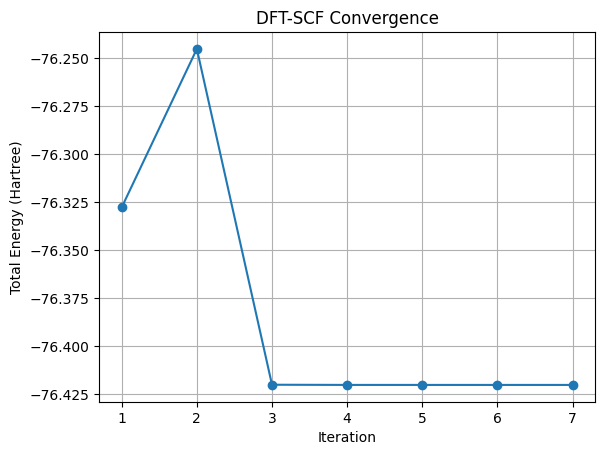

DFT energy for H2O using B3LYP: -76.42034892039445 Hartree


In [ ]:
# DFT-SCF (Kohn-Sham)

from pyscf import gto, dft
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define molecule using gto.M() function. Provide atomic positions in angstroms and basis set (here: cc-pvdz)
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'b3lyp'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy for H2O using B3LYP: {energy} Hartree")

### <font color="blue">**DFT-SCF Kohn-Sham Hamiltonian**

In [ ]:
# Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects

# Kohn-Sham formalism transforms complex many-electron problem into a simpler set of equations that describe non-interacting electrons
# but in presence of an effective potential that accounts for the effects of electron-electron interactions.

from pyscf import gto, dft

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a DFT calculation using the B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

# Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()

print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

converged SCF energy = -76.4203489203945
Kohn-Sham Hamiltonian matrix:
 [[-1.91216111e+01  4.06338633e+00 -3.69620322e+00 -7.19654917e-18
  -1.46887710e-16 -1.96943813e-02 -1.56289575e-18 -1.34007389e-17
  -3.88068587e-03  2.91989482e-18  2.26564373e-18 -1.88675866e-04
   6.73009248e-19  1.77075449e-03 -1.01666987e+00 -1.31698194e+00
  -7.45785539e-20  1.67398482e+00  1.29473947e+00 -1.01666987e+00
  -1.31698194e+00 -1.00866836e-18 -1.67398482e+00  1.29473947e+00]
 [ 4.06338633e+00 -1.45464084e+00 -1.11588848e-01 -8.19283592e-17
  -3.33587324e-16 -8.23131467e-02 -2.41138045e-17 -2.26901831e-16
  -6.58682120e-02 -6.43741631e-20  7.15573434e-18 -6.46016129e-03
  -2.95096349e-18  7.05463420e-02 -2.87959546e-01 -2.62222464e-01
   8.22474237e-18 -1.08702411e-02 -1.76931731e-02 -2.87959546e-01
  -2.62222464e-01 -3.20399132e-18  1.08702411e-02 -1.76931731e-02]
 [-3.69620322e+00 -1.11588848e-01 -1.47579592e+00 -1.09042081e-16
  -2.92821323e-16 -1.01216864e-01 -5.29949404e-17 -3.77475828e-16
  

In [ ]:
print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (24, 24)
Kohn-Sham Hamiltonian Matrix Size: 576
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: -5.915010709150705
Kohn-Sham Hamiltonian Matrix Determinant: -0.0004599949515138757
Kohn-Sham Hamiltonian Matrix Rank: 24


### <font color="blue">**Coupled Cluster (CCSD)**

In [ ]:
# Coupled Cluster (CCSD)
from pyscf import gto, scf, cc
import matplotlib.pyplot as plt

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation to obtain the reference wavefunction
mf = scf.RHF(mol)
hf_energy = mf.kernel()

# Step 3: Perform a Coupled Cluster calculation (CCSD)
ccsd_calc = cc.CCSD(mf)
ccsd_energy = ccsd_calc.kernel()

# Step 4: (Optional) Include perturbative triple excitations (CCSD(T))
ccsd_t_energy = ccsd_calc.ccsd_t()

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
print(f"HF-SCF energy: {hf_energy} Hartree")
print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -76.026793644974


<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


E(CCSD) = -76.24008590505713  E_corr = -0.2132922600831529
CCSD(T) correction = -0.00305623252366073
HF-SCF energy: -76.02679364497398 Hartree
CCSD energy: (-0.21329226008315294, array([[ 6.33700540e-05, -1.88387857e-17,  7.49449454e-18,
        -4.61530990e-05,  7.38232263e-05,  2.27696076e-19,
        -1.34977983e-17,  9.21875410e-05, -2.81284683e-19,
        -2.53114688e-20, -1.86049592e-04,  7.81733517e-17,
        -4.84349686e-17,  8.64072851e-05, -4.44652851e-20,
        -1.22493022e-18, -5.75894137e-06,  3.23335360e-05,
        -5.84211067e-18],
       [-3.92795547e-03,  2.29860212e-15, -2.26821663e-15,
         4.88303304e-05, -4.23671800e-03,  1.54980970e-17,
         7.44052300e-16, -3.65269670e-04,  1.07228184e-17,
        -7.44056957e-18, -1.46663791e-03,  6.60406956e-17,
         7.05378766e-17,  2.67235113e-03, -1.40450894e-17,
        -3.64237525e-18, -1.02607422e-04,  9.09177381e-04,
        -2.45136973e-16],
       [-5.70377535e-17, -5.94309217e-03, -1.83314596e-03,
  

### <font color="blue">**Møller-Plesset Perturbation Theory (MPn)**

In [ ]:
# Møller-Plesset Perturbation Theory (MPn)
from pyscf import gto, scf, mp

mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)
mf = scf.RHF(mol)
mf.kernel()

# MP2 single point energy calculation
mp2 = mp.MP2(mf)
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -76.0267936449738
E(MP2) = -76.2307620085712  E_corr = -0.20396836359741
E(SCS-MP2) = -76.226903584503  E_corr = -0.200109939529191
MP2 energy: -0.20396836359741044 Hartree


### <font color="blue">**Geometry Optimization**

**Geometry Optimization (HF-SCF)** - adjusting the atomic positions to find a configuration with minimal energy

[Water molecule](https://en.m.wikipedia.org/wiki/Water) (H₂O) has a bent (or V-shaped) molecular geometry

![science](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/H2O_2D_labelled.svg/320px-H2O_2D_labelled.svg.png)

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1822.png)

In [ ]:
# Geometry Optimization (HF-SCF)
from pyscf import gto, scf, geomopt

# Step 1: Define the molecule
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)

# Step 2: Perform HF calculation with geometry optimization
mf = scf.RHF(mol)

# Geometry optimization
mol_eq = geomopt.optimize(mf)

print(f"Optimized geometry:\n{mol_eq.atom_coords()}")

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-46984e7b-02c9-42a3-86f4-cf31d6362241.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.0267936449738
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0143168421
1 H     0.0000000000     0.0100821479     0.0071584211
2 H    -0.0000000000    -0.0100821479     0.0071584211
----------------------------------------------
cycle 1: E = -76.026793645  dE = -76.0268  norm(grad) = 0.0225999


Step    0 : Gradient = 1.305e-02/1.432e-02 (rms/max) Energy = -76.0267936450
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.003321   -0.000000 -0.000000  0.003321
   H  -0.000000   0.746102   0.584340   -0.000000 -0.010898 -0.001660
   H   0.000000  -0.746102   0.584340    0.000000  0.010898 -0.001660
converged SCF energy = -76.0270469068813
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000    -0.0000755904
1 H     0.0000000000    -0.0012665893     0.0000377952
2 H    -0.0000000000     0.0012665893     0.0000377952
----------------------------------------------
cycle 2: E = -76.0270469069  dE = -0.000253262  norm(grad) = 0.00179362


Step    1 : Displace = 9.203e-03/1.102e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 1.036e-03/1.267e-03 (rms/max) E (change) = -76.0270469069 (-2.533e-04) Quality = 0.921
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.63126e-01 5.60557e-01 6.01174e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.005092   -0.000000 -0.000000  0.001771
   H  -0.000000   0.748968   0.583454   -0.000000  0.002866 -0.000886
   H   0.000000  -0.748968   0.583454    0.000000 -0.002866 -0.000886
converged SCF energy = -76.0270534782029
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.0000785734
1 H     0.0000000000     0.0000518864    -0.0000392867
2 H     0.0000000000    -0.0000518864    -0.0000392867
----------------------------------------------
cycle 3: E = -76.0270534782  dE = -6.57132e-06  norm(grad) = 0.000121017


Step    2 : Displace = 2.654e-03/2.999e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 6.987e-05/7.857e-05 (rms/max) E (change) = -76.0270534782 (-6.571e-06) Quality = 0.931
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75074e-01 5.60557e-01 5.98100e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000   0.004935    0.000000 -0.000000 -0.000157
   H  -0.000000   0.748790   0.583533   -0.000000 -0.000177  0.000079
   H   0.000000  -0.748790   0.583533   -0.000000  0.000177  0.000079
converged SCF energy = -76.0270535127392
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000    -0.0000049496
1 H    -0.0000000000     0.0000021141     0.0000024748
2 H    -0.0000000000    -0.0000021141     0.0000024748
----------------------------------------------
cycle 4: E = -76.0270535127  dE = -3.45363e-08  norm(grad) = 6.75913e-06


Step    3 : Displace = 1.827e-04/1.941e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 3.902e-06/4.950e-06 (rms/max) E (change) = -76.0270535127 (-3.454e-08) Quality = 0.989
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.75074e-01 5.60557e-01 5.98100e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.395 seconds


Optimized geometry:
[[-2.06595741e-15 -6.06216733e-14  9.32501188e-03]
 [-3.41115931e-14  1.41500863e+00  1.10271700e+00]
 [ 3.61323290e-14 -1.41500863e+00  1.10271700e+00]]


**Geometry Optimization using DFT-SCF**

In [ ]:
from pyscf import gto, scf, geomopt
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize


# Step 1: Define the molecule
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',
)

mol.basis = 'cc-pvdz'
mol.build()

# Perform geometry optimization using DFT
mf = dft.RKS(mol)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf) # This function iteratively adjusts positions of atoms to minimize total energy of system

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-46984e7b-02c9-42a3-86f4-cf31d6362241.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.757000   0.586000    0.000000  0.000000  0.000000
   H   0.000000  -0.757000   0.586000    0.000000  0.000000  0.000000
converged SCF energy = -76.4203489203946
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000    -0.0000000000     0.0160000300
1 H     0.0000000000    -0.0069713070    -0.0080033176
2 H     0.0000000000     0.0069713070    -0.0080033176
----------------------------------------------
cycle 1: E = -76.4203489204  dE = -76.4203  norm(grad) = 0.0219387


Step    0 : Gradient = 1.267e-02/1.600e-02 (rms/max) Energy = -76.4203489204
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.60000e-01 5.60557e-01 5.60557e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O   0.000000   0.000000  -0.009850    0.000000  0.000000 -0.009850
   H   0.000000   0.757826   0.591030    0.000000  0.000826  0.005030
   H   0.000000  -0.757826   0.591030    0.000000 -0.000826  0.005030
converged SCF energy = -76.4206192746269
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000     0.0000000000     0.0024621575
1 H     0.0000000000    -0.0005762021    -0.0012331412
2 H     0.0000000000     0.0005762021    -0.0012331412
----------------------------------------------
cycle 2: E = -76.4206192746  dE = -0.000270354  norm(grad) = 0.0031253


Step    1 : Displace = 7.047e-03/9.920e-03 (rms/max) Trust = 1.000e-01 (=) Grad = 1.804e-03/2.462e-03 (rms/max) E (change) = -76.4206192746 (-2.704e-04) Quality = 1.142
Hessian Eigenvalues: 4.99999e-02 5.00000e-02 5.00000e-02 ... 1.45087e-01 5.25420e-01 5.60557e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000   0.000000  -0.012486   -0.000000  0.000000 -0.002636
   H  -0.000000   0.756428   0.592426   -0.000000 -0.001398  0.001396
   H  -0.000000  -0.756428   0.592426   -0.000000  0.001398  0.001396
converged SCF energy = -76.4206270213167
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O     0.0000000000    -0.0000000000     0.0000459714
1 H    -0.0000000000    -0.0001193929    -0.0000247331
2 H     0.0000000000     0.0001193929    -0.0000247331
----------------------------------------------
cycle 3: E = -76.4206270213  dE = -7.74669e-06  norm(grad) = 0.000178455


Step    2 : Displace = 2.217e-03/2.688e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 1.030e-04/1.219e-04 (rms/max) E (change) = -76.4206270213 (-7.747e-06) Quality = 0.984
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   O  -0.000000  -0.000000  -0.012346   -0.000000 -0.000000  0.000141
   H  -0.000000   0.756683   0.592411    0.000000  0.000255 -0.000015
   H  -0.000000  -0.756683   0.592411   -0.000000 -0.000255 -0.000015
converged SCF energy = -76.4206270677759
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 O    -0.0000000000     0.0000000000    -0.0000081275
1 H     0.0000000000     0.0000105436     0.0000023007
2 H     0.0000000000    -0.0000105436     0.0000023007
----------------------------------------------
cycle 4: E = -76.4206270678  dE = -4.64591e-08  norm(grad) = 1.7291e-05


Step    3 : Displace = 2.208e-04/2.603e-04 (rms/max) Trust = 2.000e-01 (+) Grad = 9.983e-06/1.079e-05 (rms/max) E (change) = -76.4206270678 (-4.646e-08) Quality = 0.916
Hessian Eigenvalues: 4.99973e-02 5.00000e-02 5.00000e-02 ... 1.57749e-01 4.91741e-01 5.60557e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 7.601 seconds


Optimized Geometry (in Angstroms):
[[-2.05823216e-14 -2.64962404e-14 -2.33303854e-02]
 [-7.90708925e-15  1.42992438e+00  1.11949400e+00]
 [-3.06772824e-14 -1.42992438e+00  1.11949400e+00]]


### **Fermionic (Molecular) Hamiltonian with Second Quantization**

In [ ]:
!pip install pyscf matplotlib openfermion openfermionpyscf -q

In [ ]:
# Fermionic (Molecular) Hamiltonian with Second Quantization
from pyscf import gto, scf, ao2mo
from openfermion import MolecularData, transforms
from openfermion.transforms import jordan_wigner
from openfermionpyscf import generate_molecular_hamiltonian
from openfermion.transforms import bravyi_kitaev

# Define molecule
geometry = [
    ('O', (0.0000000, 0.0000000, 0.0000000)),
    ('H', (0.7586022, 0.0000000, 0.5042847)),
    ('H', (-0.7586022, 0.0000000, 0.5042847))
]

basis = 'cc-pvdz' # Smaller basis set (e.g., sto-3g instead of cc-pvdz) to reduce the number of orbitals involved.
charge = 0
multiplicity = 1

# Create a MolecularData object
molecule = MolecularData(geometry, basis, multiplicity, charge)

# Perform a Hartree-Fock calculation
mol = gto.M(
    atom=geometry,
    basis=basis,
    charge=charge,
    spin=multiplicity - 1
)

mf = scf.RHF(mol)
mf.kernel()

# Number of electrons and orbitals for the molecule
num_electrons = mol.nelectron
num_orbitals = mf.mo_coeff.shape[1]

# Manually extract integrals from PySCF
h1 = mf.get_hcore()  # One-electron integrals
eri = ao2mo.kernel(mol, mf.mo_coeff)  # Two-electron integrals
nuclear_repulsion = mol.energy_nuc()

# Use OpenFermion to generate the molecular Hamiltonian
molecular_hamiltonian = generate_molecular_hamiltonian(
    geometry=geometry,
    basis=basis,
    multiplicity=multiplicity,
    charge=charge,
    n_active_electrons=num_electrons,
    n_active_orbitals=num_orbitals
)

# Get the Hamiltonian in second-quantized form
fermion_hamiltonian = transforms.get_fermion_operator(molecular_hamiltonian)

# Convert the fermionic Hamiltonian to a qubit Hamiltonian using Jordan-Wigner transformation
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)
# qubit_hamiltonian = bravyi_kitaev(fermion_hamiltonian) # To speed up: Convert to qubit Hamiltonian using Bravyi-Kitaev transform

# Print the qubit Hamiltonian
print("Qubit Hamiltonian (Jordan-Wigner):\n", qubit_hamiltonian)

**This can be computationally intensive because:**
* Number of Orbitals and Electrons: If your molecule has many orbitals (e.g., a large basis set) or electrons, the Hamiltonian will involve many terms. The Jordan-Wigner transformation processes each of these terms and converts them to qubit operators, which can take time.
* Two-Electron Integrals: These integrals contribute many terms to the Hamiltonian, and the mapping from fermions to qubits adds further complexity.

**To speed this up**:
* Try using a **smaller basis set** (e.g., sto-3g instead of cc-pvdz) to reduce the number of orbitals involved.
* **Active Space Approximation**: You can reduce the number of orbitals by focusing on an "active space" that includes only the most chemically relevant orbitals. For example, in OpenFermion-PySCF, you can define an active space of electrons and orbitals to restrict the number of orbitals used in the calculation.
* Use the **Bravyi-Kitaev transformation**: The Bravyi-Kitaev transformation may sometimes be faster and more efficient than the Jordan-Wigner transformation for certain systems, as it has better scaling for specific problem sizes.

**To speed up: Active Space Approximation and Smaller Basis Set**
* n_active_electrons = 4: Specifies the number of active electrons in the calculation. You can adjust this value based on your molecule's complexity and the level of approximation you're willing to make.
* n_active_orbitals = 6: Specifies the number of active orbitals, reducing the size of the problem.

In [ ]:
from pyscf import gto, scf, ao2mo
from openfermion import MolecularData, transforms
from openfermion.transforms import jordan_wigner
from openfermionpyscf import generate_molecular_hamiltonian

# Define the molecule
geometry = [
    ('O', (0.0000000, 0.0000000, 0.0000000)),
    ('H', (0.7586022, 0.0000000, 0.5042847)),
    ('H', (-0.7586022, 0.0000000, 0.5042847))
]
basis = 'sto-3g'  # Smaller basis set
charge = 0
multiplicity = 1

# Perform a Hartree-Fock calculation
mol = gto.M(
    atom=geometry,
    basis=basis,
    charge=charge,
    spin=multiplicity - 1
)

mf = scf.RHF(mol)
mf.kernel()

# Print the number of molecular orbitals and electrons
num_orbitals = mf.mo_coeff.shape[1]
num_electrons = mol.nelectron

print(f"Total number of orbitals: {num_orbitals}")
print(f"Total number of electrons: {num_electrons}")

# Set the active space (ensure these values are within the total available)
n_active_electrons = min(4, num_electrons)  # Adjust to be <= total number of electrons
n_active_orbitals = min(4, num_orbitals)    # Adjust to be <= total number of orbitals

# Use OpenFermion-PySCF to generate the molecular Hamiltonian with the active space
molecular_hamiltonian = generate_molecular_hamiltonian(
    geometry=geometry,
    basis=basis,
    multiplicity=multiplicity,
    charge=charge,
    n_active_electrons=n_active_electrons,
    n_active_orbitals=n_active_orbitals
)

# Get the Hamiltonian in second-quantized form
fermion_hamiltonian = transforms.get_fermion_operator(molecular_hamiltonian)

# Convert the fermionic Hamiltonian to a qubit Hamiltonian using Jordan-Wigner transformation
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)

# Print the qubit Hamiltonian
print("Qubit Hamiltonian (Jordan-Wigner):\n", qubit_hamiltonian)